<h1>Applying Linear Regression on Mobile Dataset</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv("Mobile-Price-Prediction-cleaned_data.csv")

In [4]:
df = df.reset_index(drop=True)

In [5]:
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


<Axes: xlabel='Price', ylabel='Count'>

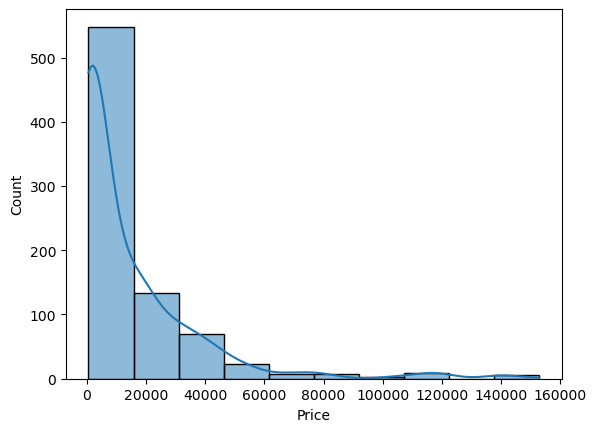

In [11]:
sns.histplot(df['Price'], bins=10, kde=True)

In [13]:
df.info

<bound method DataFrame.info of      Ratings   RAM    ROM  Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  \
0        4.3   4.0  128.0         6.00           48       13.0           4000   
1        3.4   6.0   64.0         4.50           48       12.0           4000   
2        4.3   4.0    4.0         4.50           64       16.0           4000   
3        4.4   6.0   64.0         6.40           48       15.0           3800   
4        4.5   6.0  128.0         6.18           35       15.0           3800   
..       ...   ...    ...          ...          ...        ...            ...   
802      3.8   6.0   32.0         4.54           48       12.0           2800   
803      4.1   8.0   64.0         4.54           64        8.0           2500   
804      4.4   3.0   32.0         6.20           48        1.0           3800   
805      3.7  10.0   32.0         4.50           64        8.0           3500   
806      3.5   6.0   32.0         4.50           64       15.0           1050

In [15]:
df.columns

Index(['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam',
       'Battery_Power', 'Price'],
      dtype='object')

In [17]:
x = df[['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam',
       'Battery_Power']]

In [19]:
y = df[['Price']]

In [21]:
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)


In [23]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (807, 7)
Shape of y: (807, 1)


In [25]:
print("Missing values in x:\n", x.isnull().sum())
print("Missing values in y:\n", y.isnull().sum())

Missing values in x:
 Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
dtype: int64
Missing values in y:
 Price    0
dtype: int64


In [27]:
x_test,x_train, y_test, y_train = train_test_split(x,y,test_size=0.3)

In [29]:
lm = LinearRegression()

In [31]:
lm.fit(x_train, y_train)

LinearRegression()

In [33]:
print(x_train.shape)
print(y_train.shape)

(243, 7)
(243, 1)


In [35]:
lm.intercept_

array([-101379.87511084])

In [37]:
lm.coef_

array([[ 2.51404894e+04,  2.32903965e+03,  1.10806101e+02,
         6.66011645e+02, -3.28513320e+02,  2.80987005e+02,
         3.68941880e-01]])

In [39]:
preds = lm.predict(x_test)

In [41]:
preds.shape

(564, 1)

In [43]:
y_test.shape

(564, 1)

In [45]:
preds_reshaped = np.reshape(preds, -1)


In [47]:
y_test_reshaped = np.reshape(y_test, -1)

<Axes: >

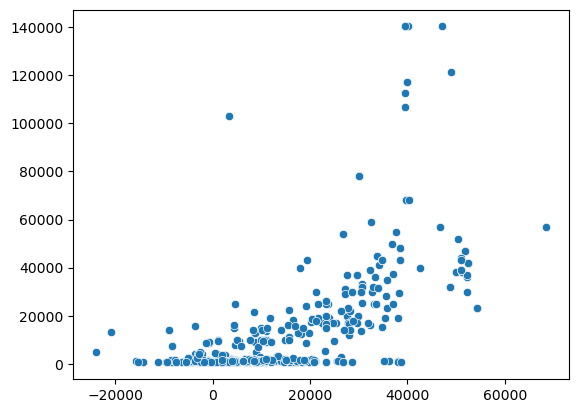

In [49]:
sns.scatterplot(x=preds_reshaped, y=y_test_reshaped)

<Axes: ylabel='Count'>

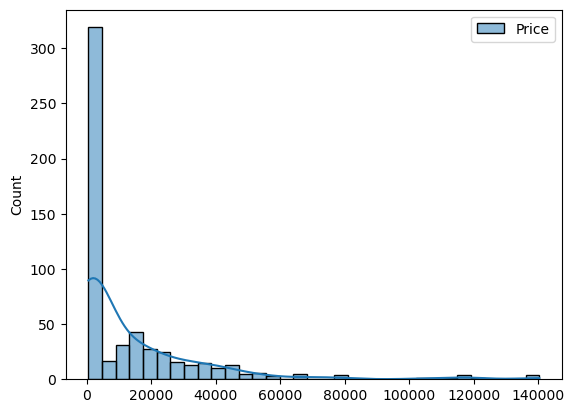

In [51]:
sns.histplot((y_test),kde=True)

In [53]:
lm.predict([[4.5,6,128,6.5,48,16,4000]])

E:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[34441.74173572]])

In [55]:
np.sqrt(metrics.mean_squared_error(y_test,preds))

16948.855948392524

In [57]:
from sklearn.metrics import r2_score

In [59]:
r2_score(y_test, preds)

0.4359091960689706